In [1]:
# Install dependencies
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [55]:
# Import necessary libraries
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import scipy


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


Get the data and preprocess it


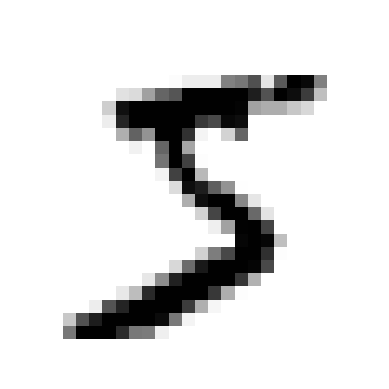

In [36]:
# Load the dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[0]
# Convert target variable to integer type
y = y.astype(np.uint8)

In [21]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [59]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Convert labels to dense format (if needed, just reshape)
y_train_dense = y_train.reshape(-1, 1)
y_test_dense = y_test.reshape(-1, 1)

# Fit and transform
y_train_encoded = encoder.fit_transform(y_train_dense)
y_test_encoded = encoder.transform(y_test_dense)


Training the model

In [ ]:
#Stochastic Gradient Descent (SGD) Classifier for MNIST
# Reshape the data to ensure it is 2D (if needed)
# Ensure X_train and X_test are 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SGD classifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)  # 'hinge' makes it work like a linear SVM
# Ensure y_train and y_test are in the correct format for SGDClassifier

# Convert one-hot encoded labels back to integer labels
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Train the classifier with correctly formatted labels
sgd_clf.fit(X_train_scaled, y_train_single)





,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [66]:
#Random Forest Classifier for MNIST
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest Classifier
rf_clf.fit(X_train_scaled, y_train_single)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Performance metrics of each model

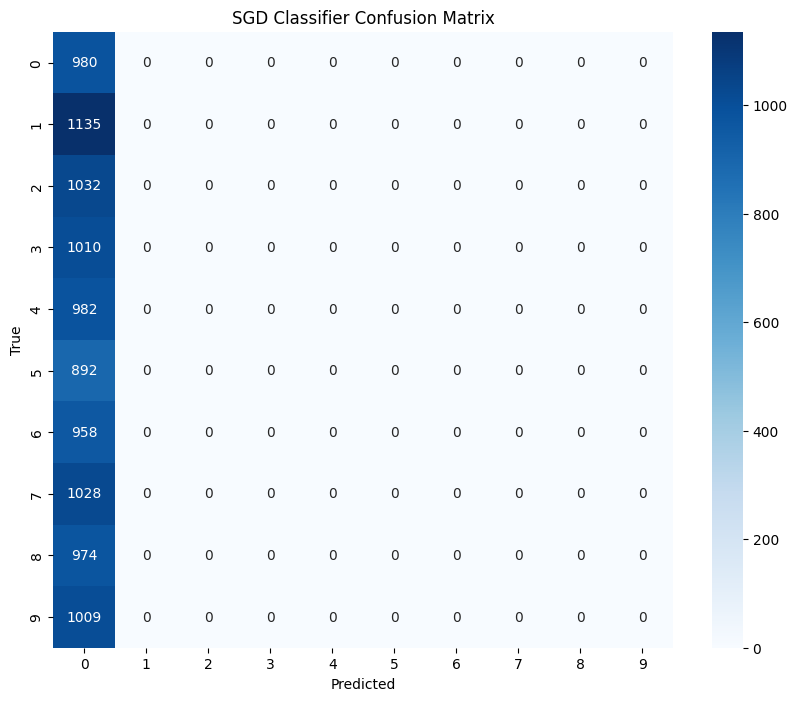

SGDClassifier Accuracy: 0.0980


In [ ]:
# Stochastic Gradient Descent (SGD) Classifier for MNIST
# Make predictions
y_pred = sgd_clf.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test_single, y_pred)
# Plot confusion matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD Classifier Confusion Matrix')
plt.show()


In [83]:
# Evaluate accuracy
accuracy = accuracy_score(y_test_single, y_pred)
print(f"SGDClassifier Accuracy: {accuracy:.4f}")
precision = precision_score(y_test_single, y_pred, average='weighted')
recall = recall_score(y_test_single, y_pred, average='weighted')

print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
f1 = f1_score(y_test_single, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

SGDClassifier Accuracy: 0.0980
Precision Score: 0.0096
Recall Score: 0.0980
F1 Score: 0.0175


c:\Users\OLALERE\Desktop\Mnist Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


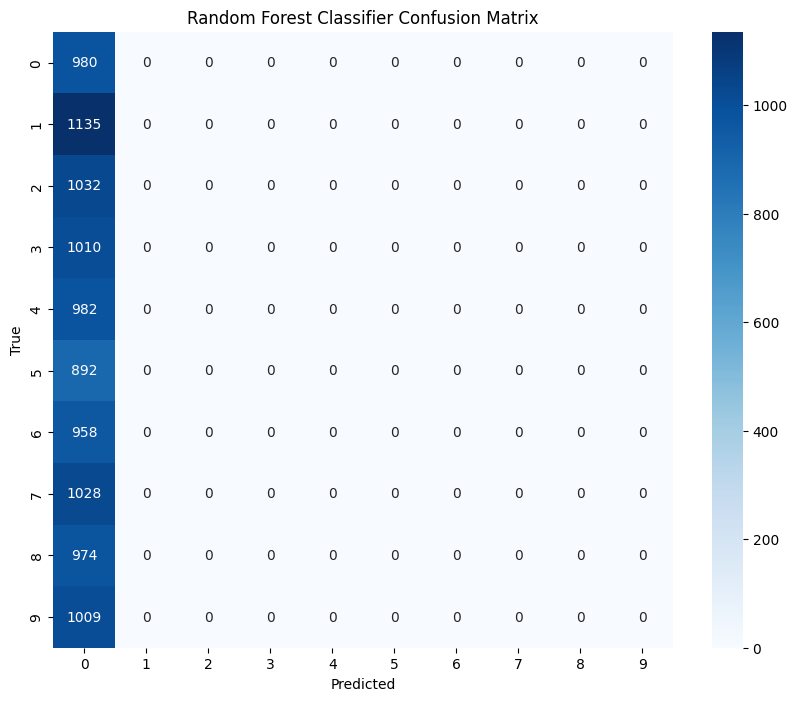

Random Forest F1 Score: 0.0175
Random Forest Accuracy: 0.0980
Random Forest Precision Score: 0.0096
Random Forest Recall Score: 0.0980


c:\Users\OLALERE\Desktop\Mnist Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# Random Forest Classifier for MNIST
# Generate predictions
y_pred_rf = rf_clf.predict(X_test_scaled)
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test_single, y_pred_rf)

# Confusion matrix
cm_rf = confusion_matrix(y_test_single, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()



In [85]:
# Calculate precision and recall
precision_rf = precision_score(y_test_single, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_single, y_pred_rf, average='weighted')
f1_score_rf = f1_score(y_test_single, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_score_rf:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision Score: {precision_rf:.4f}")
print(f"Random Forest Recall Score: {recall_rf:.4f}")

Random Forest F1 Score: 0.0175
Random Forest Accuracy: 0.0980
Random Forest Precision Score: 0.0096
Random Forest Recall Score: 0.0980


c:\Users\OLALERE\Desktop\Mnist Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


##Visualize errors (plot worst misclassifications)

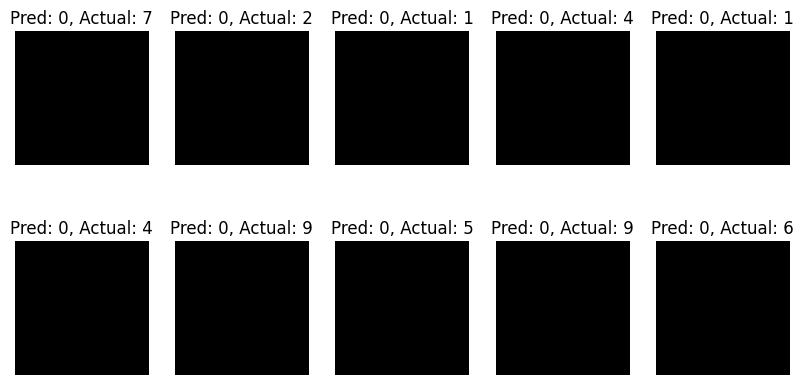

In [86]:
# Get misclassified indices
misclassified_indices = np.where(y_pred != y_test_single)[0]

# Select the worst misclassifications
worst_misclassified = misclassified_indices[:10]  # Show 10 worst cases

# Plot misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(worst_misclassified):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_scaled[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, Actual: {y_test_single[idx]}")
    plt.axis("off")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(sgd_clf, "mnist_model.joblib")


